In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta, datetime
import seaborn as sns

In [2]:
from debug import local_settings, timeifdebug, timeargsifdebug, frame_splain

In [3]:
df = pd.read_csv('activities.csv')

In [4]:
df.head()

,Date,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
0,4/26/18,"2,635","2,931",1.38,2,"1,347",93,0,0,566
1,4/27/18,"3,649","9,971",4.70,19,"1,158",219,46,17,"1,752"
2,4/28/18,"3,379","3,521",1.66,2,702,155,22,11,"1,124"
3,4/29/18,"2,851","1,639",0.77,0,891,122,0,0,602
4,4/30/18,"2,825","1,323",0.62,0,880,104,0,0,540


In [5]:
df.Date.value_counts().sort_values(ascending=False).head()

8/15/18     1
8/11/18     1
11/19/18    1
7/17/18     1
10/30/18    1
Name: Date, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
Date                      225 non-null object
Calories Burned           225 non-null object
Steps                     225 non-null object
Distance                  225 non-null float64
Floors                    225 non-null int64
Minutes Sedentary         225 non-null object
Minutes Lightly Active    225 non-null int64
Minutes Fairly Active     225 non-null int64
Minutes Very Active       225 non-null int64
Activity Calories         225 non-null object
dtypes: float64(1), int64(4), object(5)
memory usage: 17.7+ KB


In [7]:
df.Date=pd.to_datetime(df.Date, format='%m/%d/%y')
df.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
Date                      225 non-null datetime64[ns]
Calories Burned           225 non-null object
Steps                     225 non-null object
Distance                  225 non-null float64
Floors                    225 non-null int64
Minutes Sedentary         225 non-null object
Minutes Lightly Active    225 non-null int64
Minutes Fairly Active     225 non-null int64
Minutes Very Active       225 non-null int64
Activity Calories         225 non-null object
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 17.7+ KB


In [8]:
dmax = df.Date.max()
dmin = df.Date.min()
dmax - dmin + timedelta(days=1)

Timedelta('225 days 00:00:00')

In [9]:
df = df.set_index('Date')

In [10]:
df.dtypes

Calories Burned            object
Steps                      object
Distance                  float64
Floors                      int64
Minutes Sedentary          object
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories          object
dtype: object

In [11]:
df['Calories Burned'] = df['Calories Burned'].str.replace(',','').astype(int)
df['Steps'] = df['Steps'].str.replace(',','').astype(int)
df['Minutes Sedentary'] = df['Minutes Sedentary'].str.replace(',','').astype(int)
df['Activity Calories'] = df['Activity Calories'].str.replace(',','').astype(int)

In [12]:
df = df.rename(columns={
    'Calories Burned': 'cals_burned',
    'Steps': 'steps',
    'Distance': 'dist',
    'Floors': 'flrs',
    'Minutes Sedentary': 'mins_sed',
    'Minutes Lightly Active': 'mins_light',
    'Minutes Fairly Active': 'mins_mod',
    'Minutes Very Active': 'mins_heavy',
    'Activity Calories': 'activity_cals',
})

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 225 entries, 2018-04-26 to 2018-12-06
Data columns (total 9 columns):
cals_burned      225 non-null int64
steps            225 non-null int64
dist             225 non-null float64
flrs             225 non-null int64
mins_sed         225 non-null int64
mins_light       225 non-null int64
mins_mod         225 non-null int64
mins_heavy       225 non-null int64
activity_cals    225 non-null int64
dtypes: float64(1), int64(8)
memory usage: 17.6 KB


In [13]:
df['mins_tot'] = df.mins_sed + df.mins_light + df.mins_mod + df.mins_heavy
df.head()

,cals_burned,steps,dist,flrs,mins_sed,mins_light,mins_mod,mins_heavy,activity_cals,mins_tot
Date,,,,,,,,,,
2018-04-26,2635,2931,1.38,2,1347,93,0,0,566,1440
2018-04-27,3649,9971,4.70,19,1158,219,46,17,1752,1440
2018-04-28,3379,3521,1.66,2,702,155,22,11,1124,890
2018-04-29,2851,1639,0.77,0,891,122,0,0,602,1013
2018-04-30,2825,1323,0.62,0,880,104,0,0,540,984


In [14]:
df['mins_off'] = 1440 - df.mins_tot
df.head(5)

,cals_burned,steps,dist,flrs,mins_sed,mins_light,mins_mod,mins_heavy,activity_cals,mins_tot,mins_off
Date,,,,,,,,,,,
2018-04-26,2635,2931,1.38,2,1347,93,0,0,566,1440,0
2018-04-27,3649,9971,4.70,19,1158,219,46,17,1752,1440,0
2018-04-28,3379,3521,1.66,2,702,155,22,11,1124,890,550
2018-04-29,2851,1639,0.77,0,891,122,0,0,602,1013,427
2018-04-30,2825,1323,0.62,0,880,104,0,0,540,984,456


In [15]:
import wrangle_fitbit as wf

In [16]:
df = wf.get_activities_data()
frame_splain(df, splain=True, maxcols=15)

DATAFRAME SHAPE:
(225, 12)

DATAFRAME INFO:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 225 entries, 2018-04-26 to 2018-12-06
Data columns (total 12 columns):
cals_burned      225 non-null int64
steps            225 non-null int64
dist             225 non-null float64
flrs             225 non-null int64
mins_sed         225 non-null int64
mins_light       225 non-null int64
mins_mod         225 non-null int64
mins_heavy       225 non-null int64
activity_cals    225 non-null int64
mins_tot         225 non-null int64
mins_off         225 non-null int64
weekday          225 non-null object
dtypes: float64(1), int64(10), object(1)
memory usage: 22.9+ KB
None

DATAFRAME DESCRIPTION:
               count         mean          std    min      25%      50%  \
cals_burned    225.0  3401.911111   632.426578  799.0  3069.00  3385.00   
steps          225.0  8536.186667  5255.746608    0.0  4714.00  7806.00   
dist           225.0     4.046800     2.506253    0.0     2.22     3.68   
flrs

In [17]:
df.head().T

date,2018-04-26 00:00:00,2018-04-27 00:00:00,2018-04-28 00:00:00,2018-04-29 00:00:00,2018-04-30 00:00:00
cals_burned,2635,3649,3379,2851,2825
steps,2931,9971,3521,1639,1323
dist,1.38,4.7,1.66,0.77,0.62
flrs,2,19,2,0,0
mins_sed,1347,1158,702,891,880
mins_light,93,219,155,122,104
mins_mod,0,46,22,0,0
mins_heavy,0,17,11,0,0
activity_cals,566,1752,1124,602,540
mins_tot,1440,1440,890,1013,984


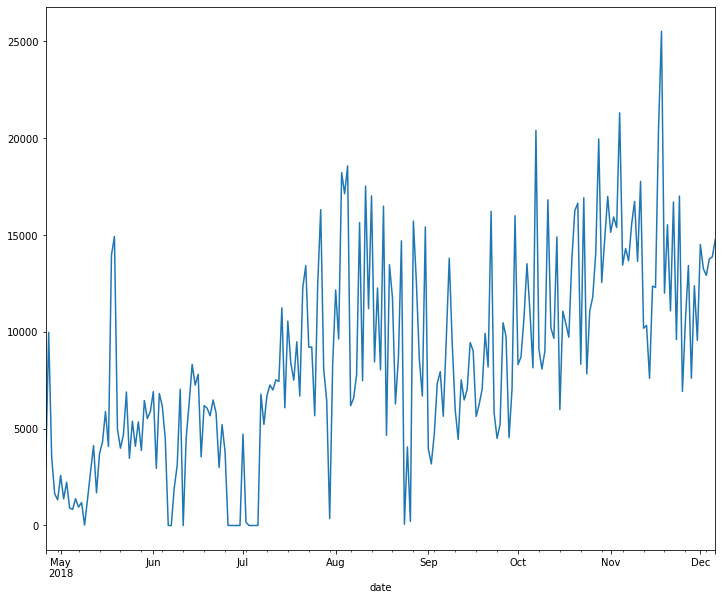

In [18]:
plt.figure(figsize=(12,10))
df.steps.plot()
plt.show()

In [19]:
df[df.steps==0]

,cals_burned,steps,dist,flrs,mins_sed,mins_light,mins_mod,mins_heavy,activity_cals,mins_tot,mins_off,weekday
date,,,,,,,,,,,,
2018-06-06,2145,0,0.0,0,1440,0,0,0,0,1440,0,3-Wed
2018-06-07,2146,0,0.0,0,1440,0,0,0,0,1440,0,4-Thu
2018-06-11,2146,0,0.0,0,1440,0,0,0,0,1440,0,1-Mon
2018-06-26,2144,0,0.0,0,1440,0,0,0,0,1440,0,2-Tue
2018-06-27,2145,0,0.0,0,1440,0,0,0,0,1440,0,3-Wed
2018-06-28,2145,0,0.0,0,1440,0,0,0,0,1440,0,4-Thu
2018-06-29,2180,0,0.0,0,1437,3,0,0,39,1440,0,5-Fri
2018-06-30,2145,0,0.0,0,1440,0,0,0,0,1440,0,6-Sat
2018-07-03,2144,0,0.0,0,1440,0,0,0,0,1440,0,2-Tue


In [20]:
df[df.cals_burned<1000]

,cals_burned,steps,dist,flrs,mins_sed,mins_light,mins_mod,mins_heavy,activity_cals,mins_tot,mins_off,weekday
date,,,,,,,,,,,,
2018-08-26,799,207,0.1,1,28,13,0,0,51,41,1399,0-Sun


In [28]:
df['cals_idle'] = df.cals_burned - df.activity_cals
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 225 entries, 2018-04-26 to 2018-12-06
Data columns (total 13 columns):
cals_burned      225 non-null int64
steps            225 non-null int64
dist             225 non-null float64
flrs             225 non-null int64
mins_sed         225 non-null int64
mins_light       225 non-null int64
mins_mod         225 non-null int64
mins_heavy       225 non-null int64
activity_cals    225 non-null int64
mins_tot         225 non-null int64
mins_off         225 non-null int64
weekday          225 non-null object
cals_idle        225 non-null int64
dtypes: float64(1), int64(11), object(1)
memory usage: 34.6+ KB


In [46]:
def all_line_plots(df):
    for col in df.columns[(df.dtypes == 'int64') | (df.dtypes == 'float64')]:
        plt.figure(figsize=(7,5))
        df[col].plot()
        plt.ylabel(col)
        plt.show()

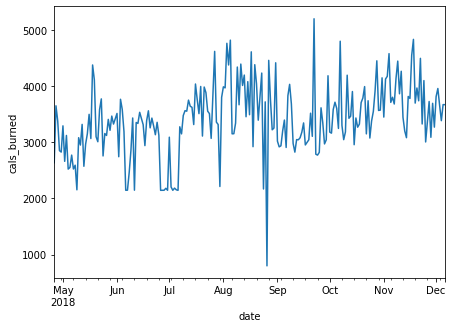

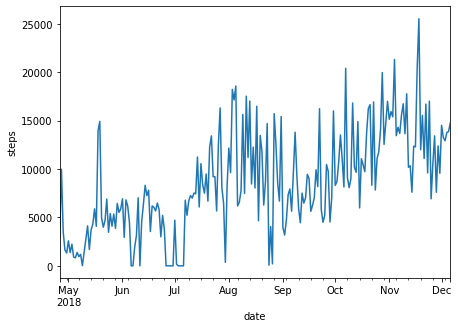

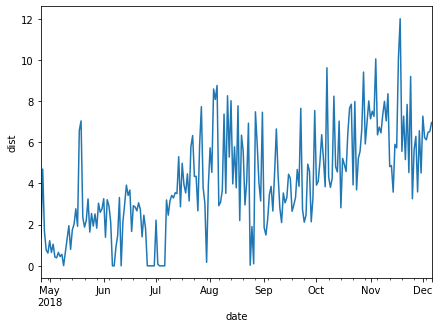

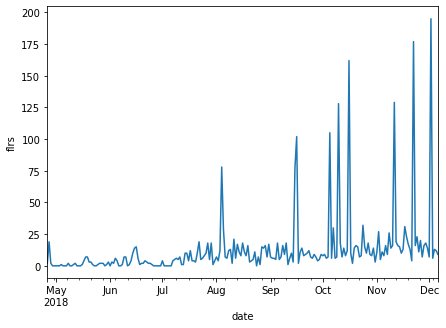

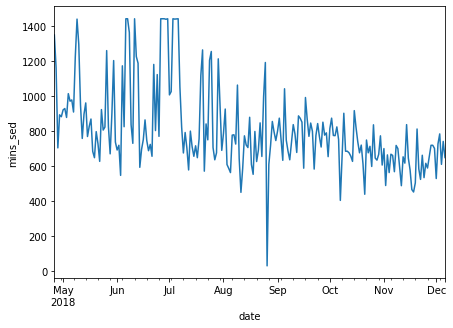

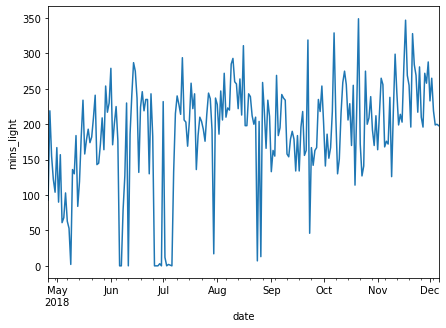

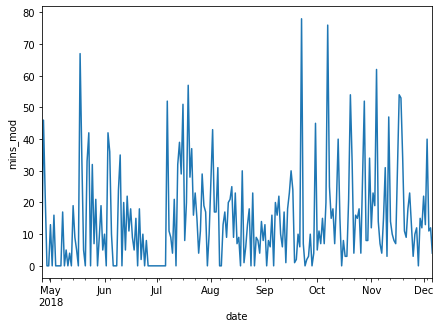

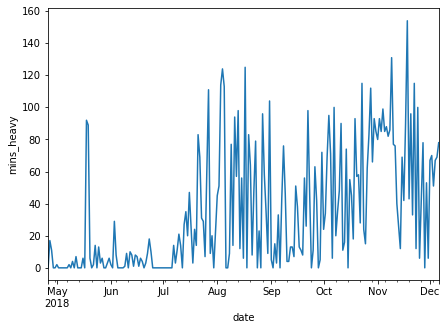

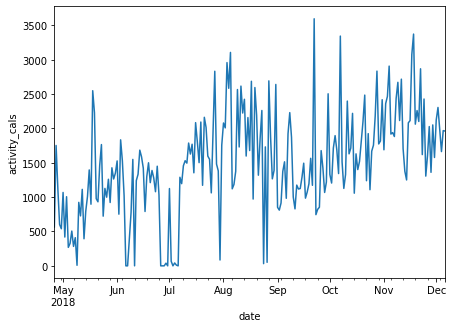

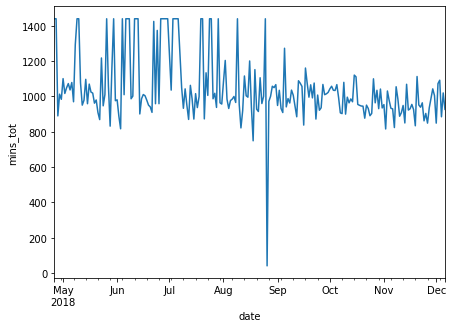

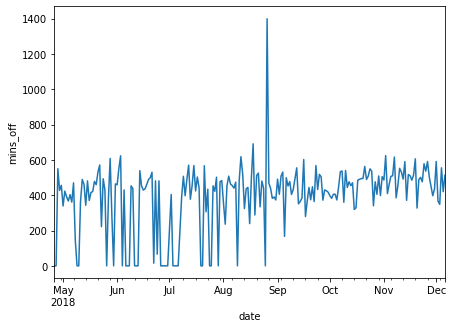

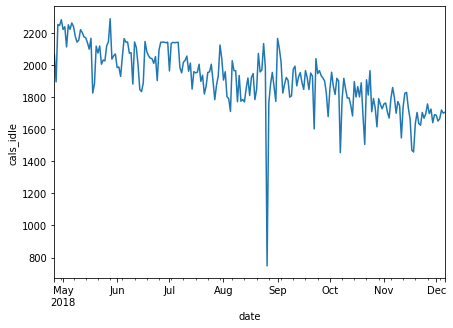

In [38]:
show_plots(df)

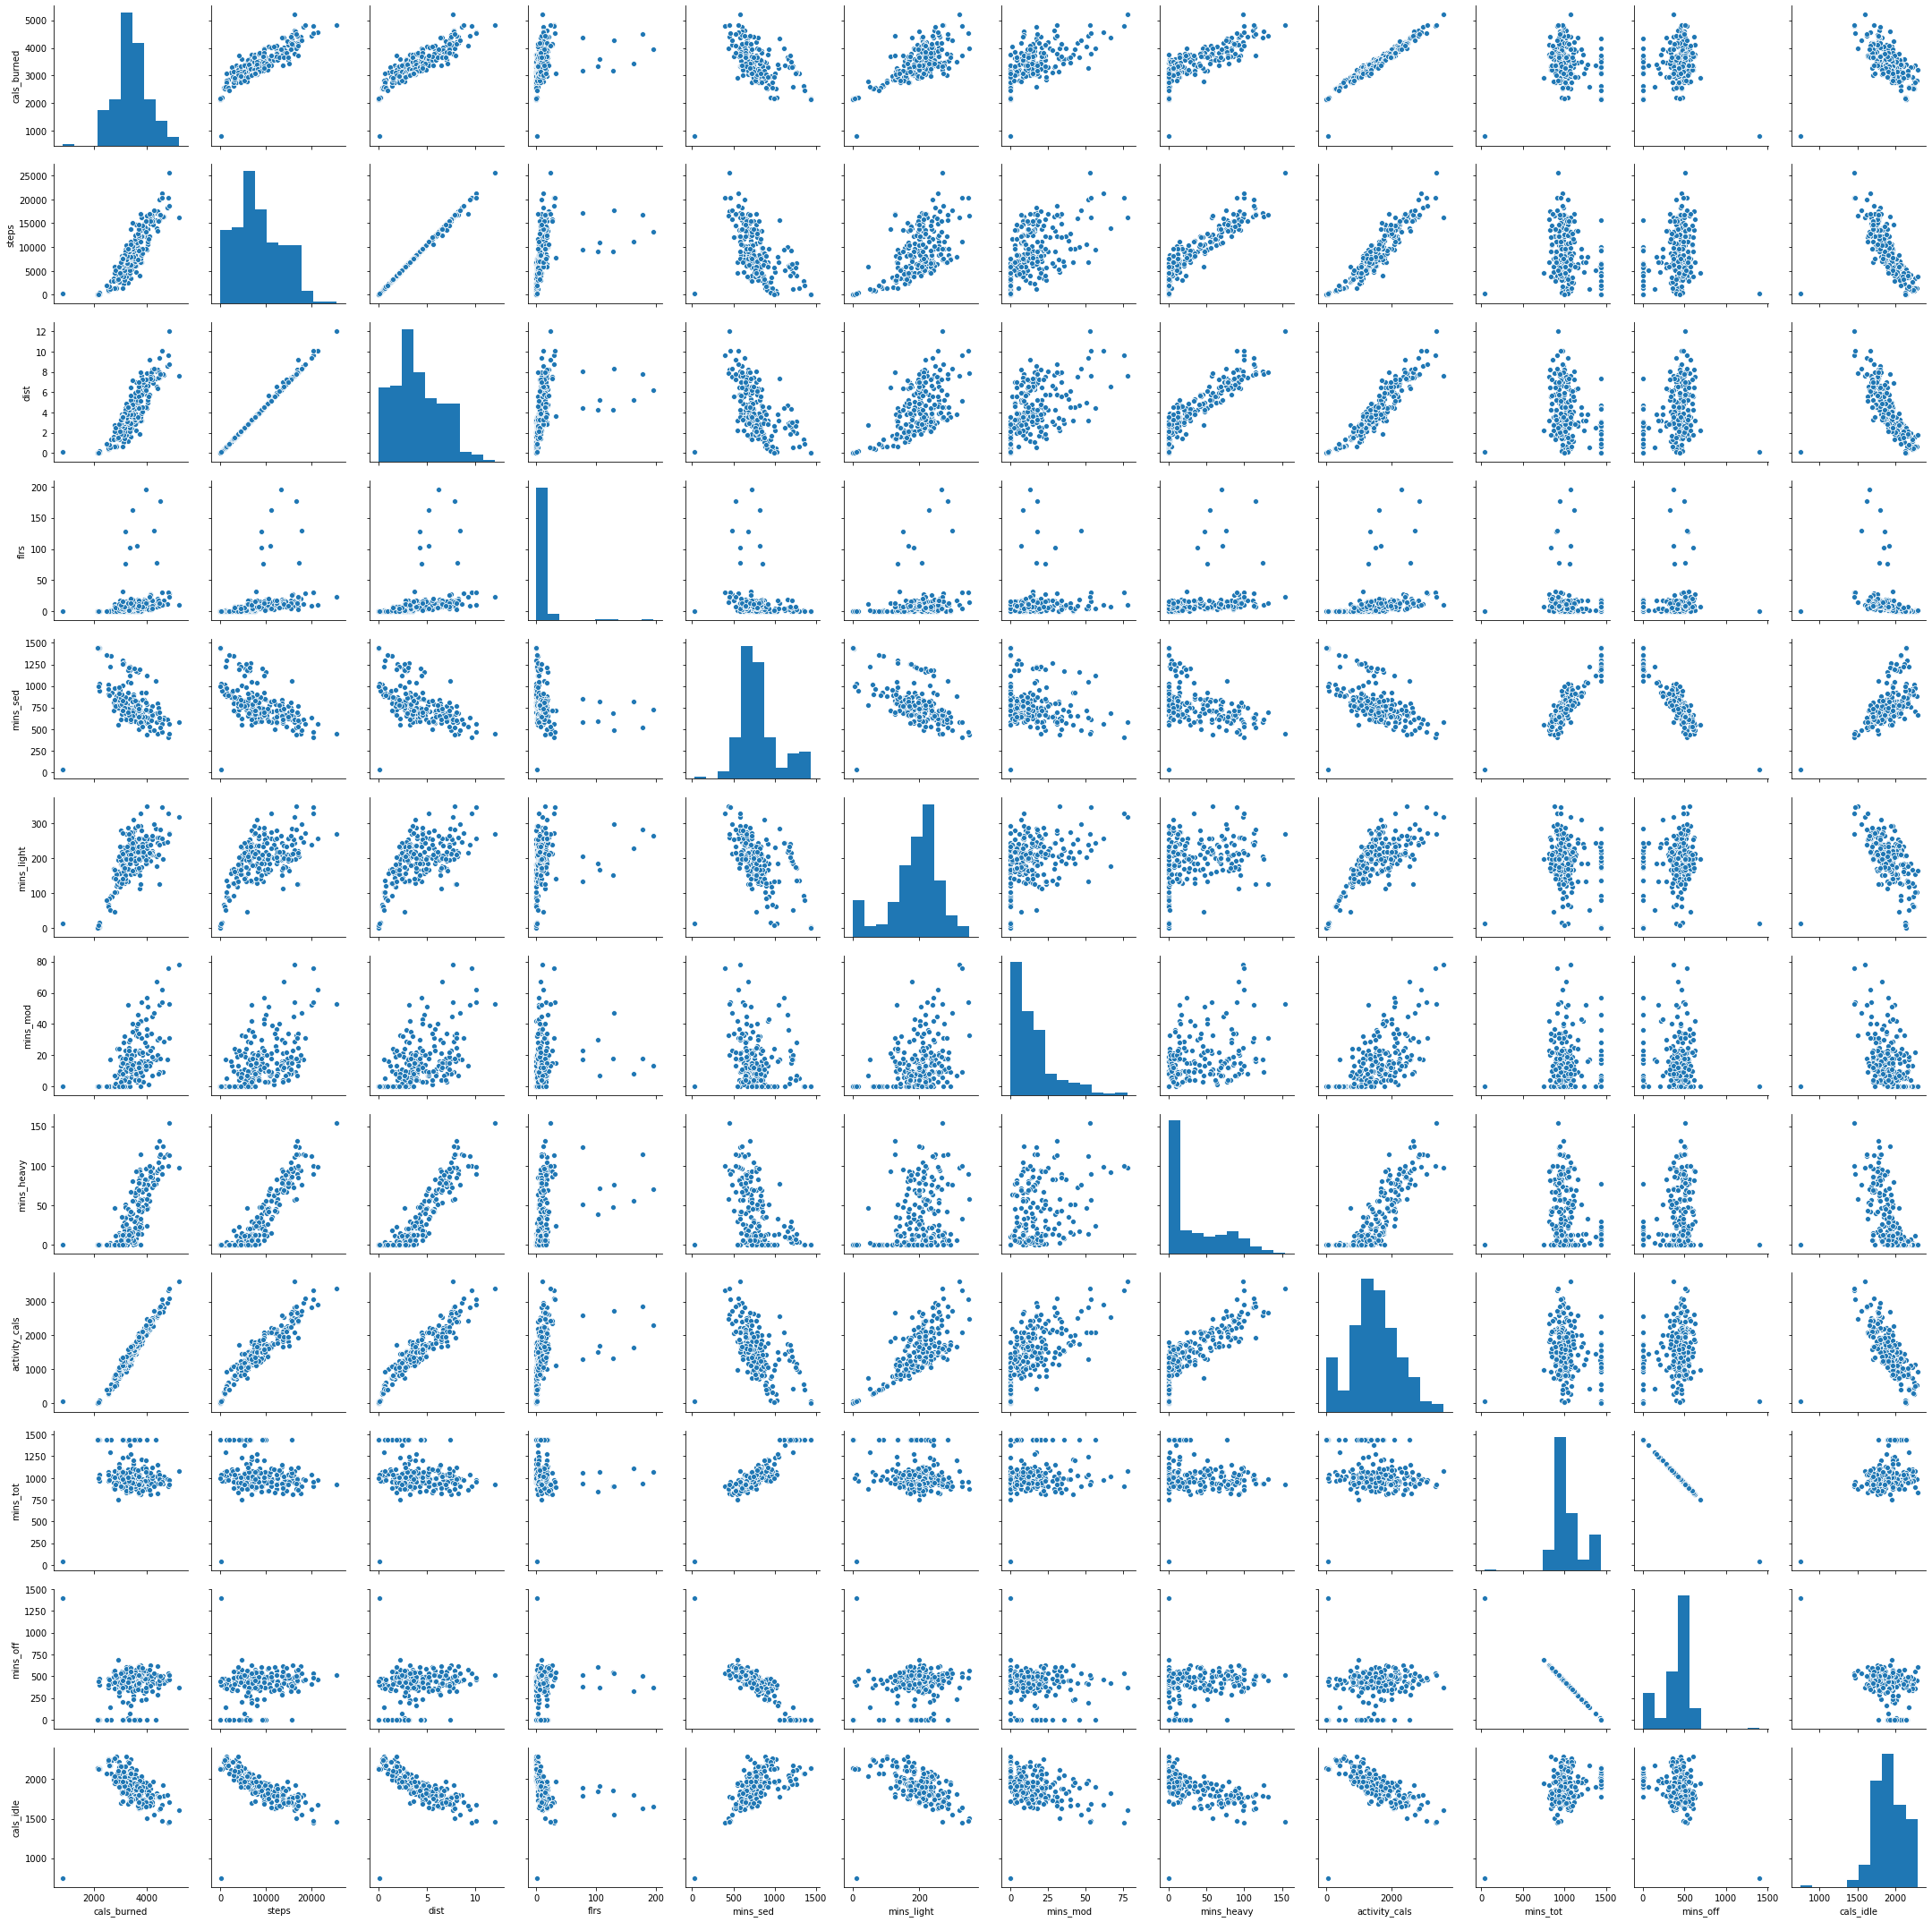

In [27]:
sns.pairplot(df)

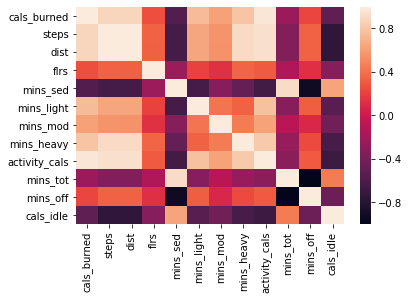

In [29]:
cor = df.corr()

sns.heatmap(cor)

In [43]:
dfwd=df.select_dtypes(exclude='object').diff(1)
dfwd

,cals_burned,steps,dist,flrs,mins_sed,mins_light,mins_mod,mins_heavy,activity_cals,mins_tot,mins_off,cals_idle
date,,,,,,,,,,,,
2018-04-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-04-27,1014.0,7040.0,3.32,17.0,-189.0,126.0,46.0,17.0,1186.0,0.0,0.0,-172.0
2018-04-28,-270.0,-6450.0,-3.04,-17.0,-456.0,-64.0,-24.0,-6.0,-628.0,-550.0,550.0,358.0
2018-04-29,-528.0,-1882.0,-0.89,-2.0,189.0,-33.0,-22.0,-11.0,-522.0,123.0,-123.0,-6.0
2018-04-30,-26.0,-316.0,-0.15,0.0,-11.0,-18.0,0.0,0.0,-62.0,-29.0,29.0,36.0
2018-05-01,467.0,1258.0,0.60,0.0,39.0,63.0,13.0,2.0,528.0,117.0,-117.0,-61.0
2018-05-02,-632.0,-1209.0,-0.57,0.0,8.0,-77.0,-13.0,-2.0,-649.0,-84.0,84.0,17.0
2018-05-03,461.0,860.0,0.40,0.0,-51.0,67.0,16.0,0.0,587.0,32.0,-32.0,-126.0
2018-05-04,-599.0,-1328.0,-0.62,1.0,136.0,-96.0,-16.0,0.0,-737.0,24.0,-24.0,138.0


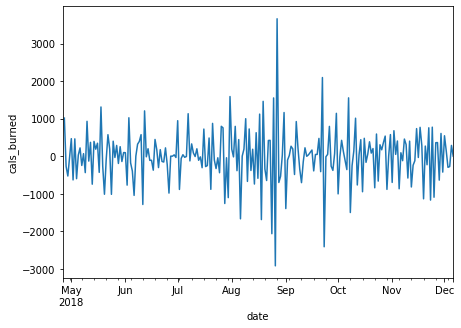

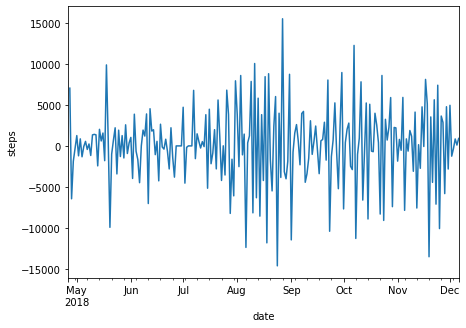

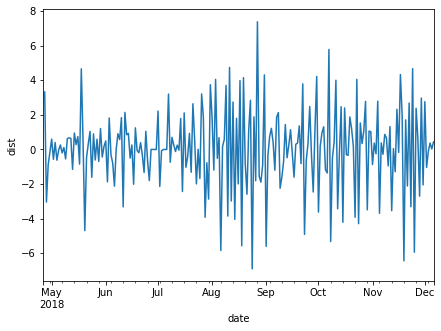

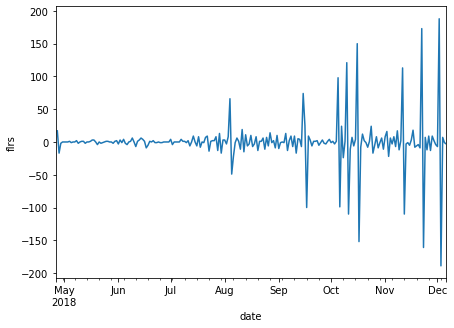

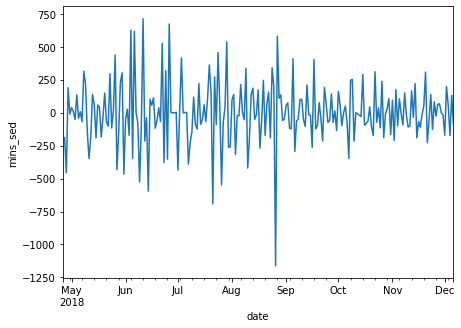

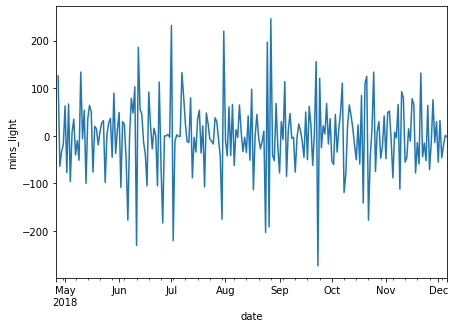

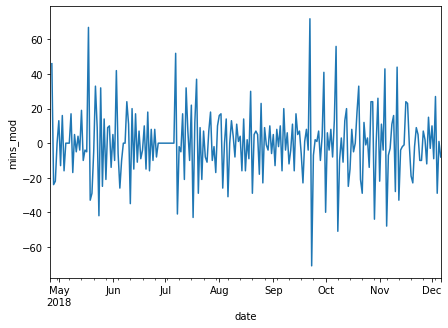

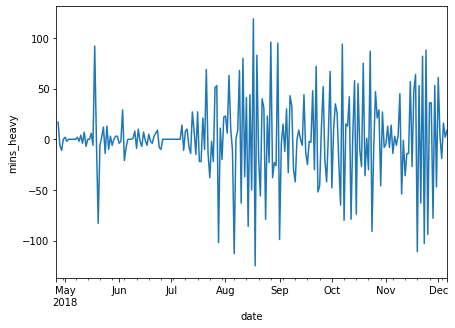

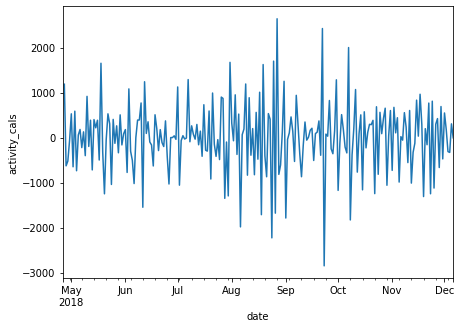

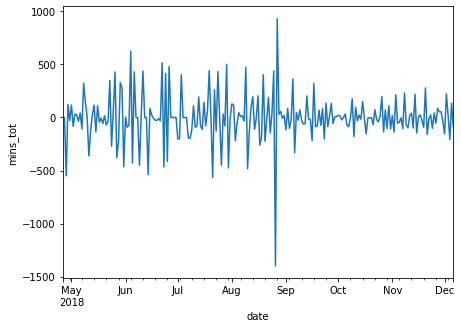

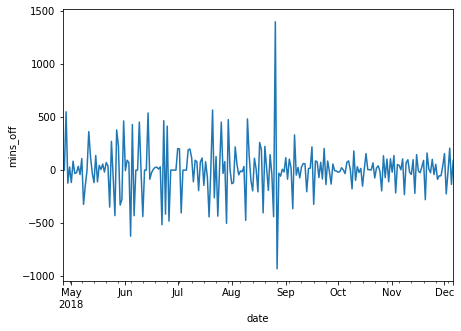

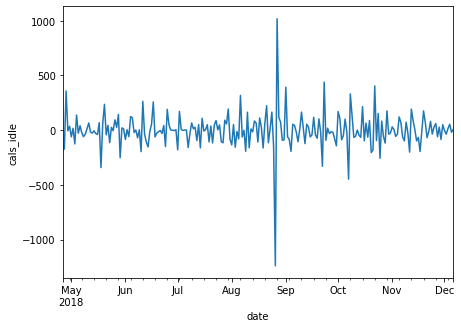

In [44]:
show_plots(dfwd)

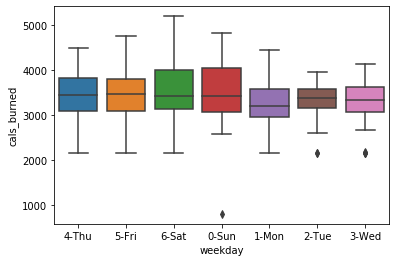

In [45]:
sns.boxplot(data=df,x='weekday',y='cals_burned')

In [89]:
def all_box_plots(df, x_col='weekday'):
    for col in df.columns[(df.dtypes == 'int64') | (df.dtypes == 'float64')]:
        plt.figure(figsize=(7,5))
        sns.boxplot(data=df.sort_values(by=x_col),x=x_col,y=col,showmeans=True)

        plt.hlines(df[col].mean(),0,6, color='limegreen')
        plt
        plt.ylabel(col)
        plt.show()

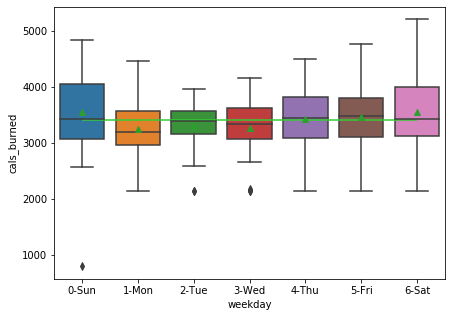

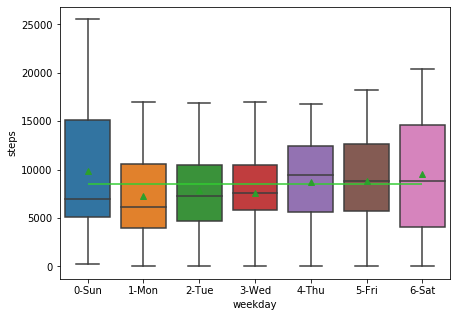

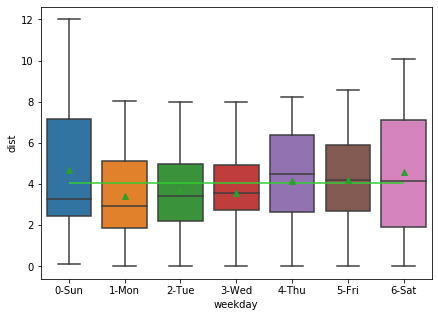

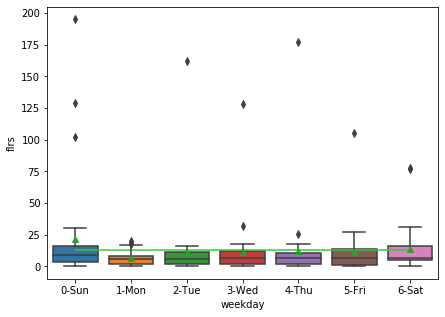

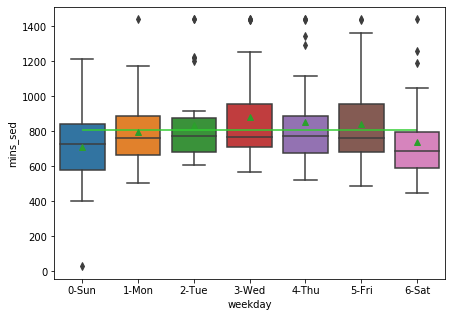

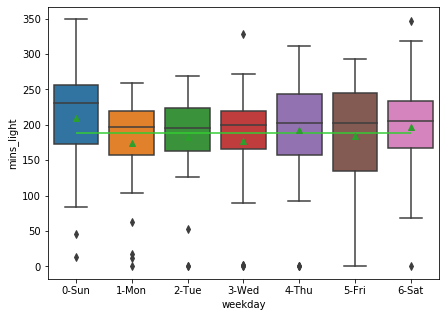

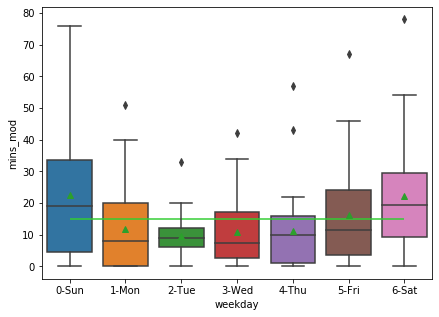

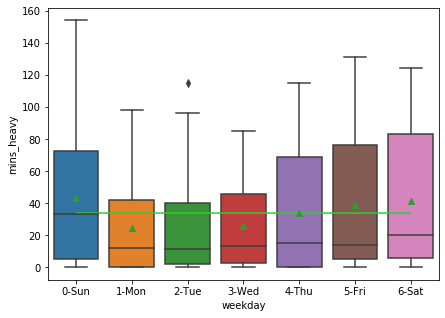

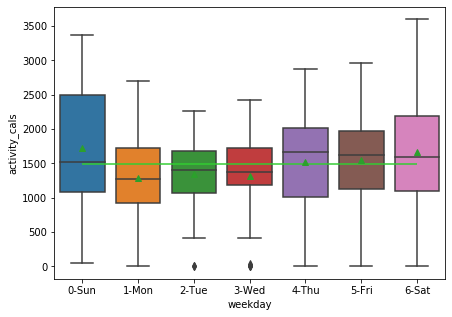

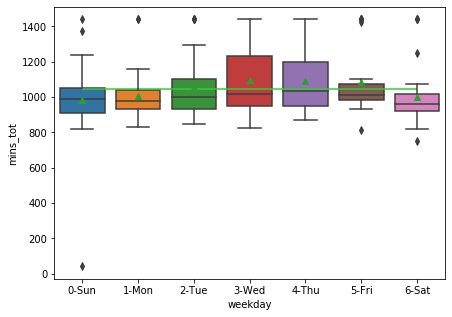

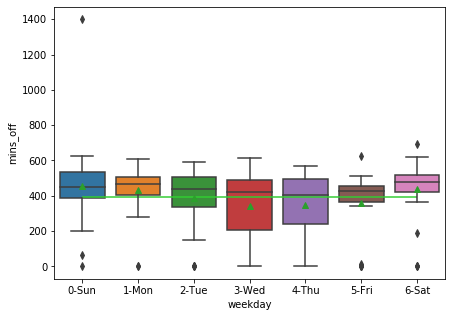

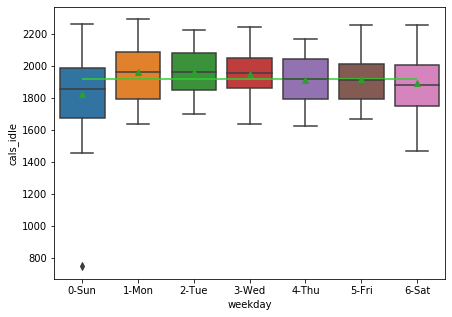

In [91]:
all_box_plots(df)

In [ ]:
dfd['avg_7d']= dfd.coffee_consumption.rolling(7).mean()
dfd['avg_28d']= dfd.coffee_consumption.rolling(28).mean()


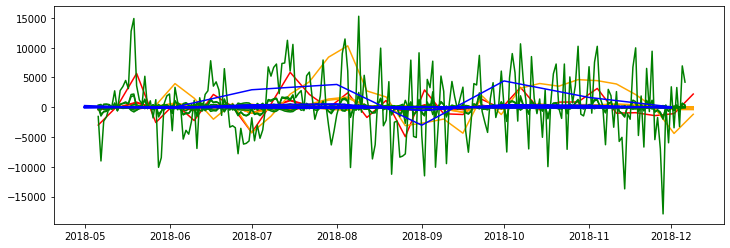

In [113]:
plt.figure(figsize=(12,4))
plt.plot(dfn.resample('W').mean().diff(periods=1),color='red')
plt.plot(dfn.resample('W').mean().diff(periods=4),color='orange')
plt.plot(dfn.diff(periods=10),color='green')
plt.plot(dfn.resample('MS').mean().diff(periods=1),color='blue')

In [107]:
def df_limit_numerics(df):
    new_df = df[list(df.columns[(df.dtypes == 'int64') | (df.dtypes == 'float64') | (df.dtypes == 'bool')])]
    return new_df

In [111]:
dfn=df_limit_numerics(df)
dfn.dtypes

cals_burned        int64
steps              int64
dist             float64
flrs               int64
mins_sed           int64
mins_light         int64
mins_mod           int64
mins_heavy         int64
activity_cals      int64
mins_tot           int64
mins_off           int64
cals_idle          int64
dtype: object

In [139]:
def all_line_5sample_plots(df):
    for col in df.columns[(df.dtypes == 'int64') | (df.dtypes == 'float64')]:
        plt.figure(figsize=(12,6))
        plt.plot(df[col].rolling(3).mean(),color='red')
        plt.plot(df[col].rolling(5).mean(),color='orange')
        plt.plot(df[col].rolling(7).mean(),color='yellow')
        plt.plot(df[col].rolling(10).mean(),color='green')
        plt.plot(df[col].rolling(14).mean(),color='blue')
        plt.ylabel(col)
        plt.show()

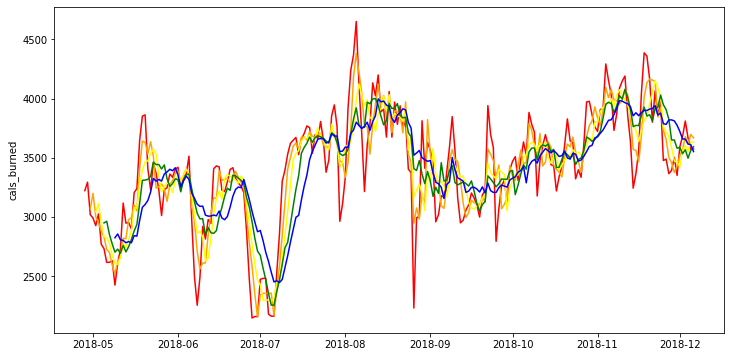

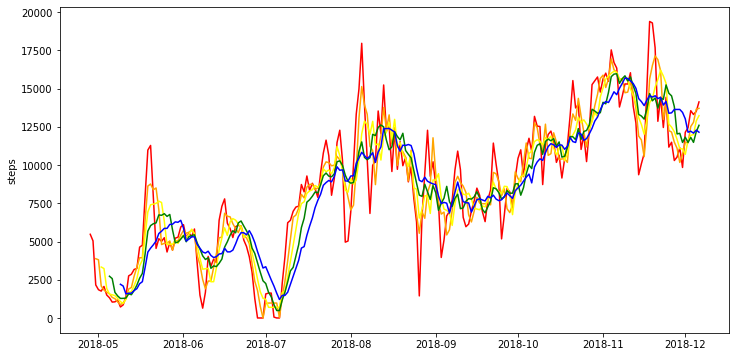

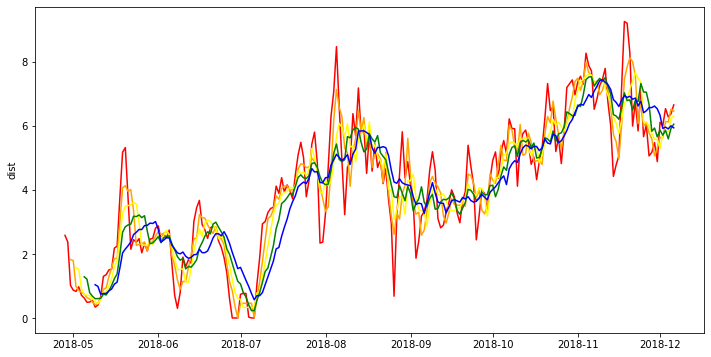

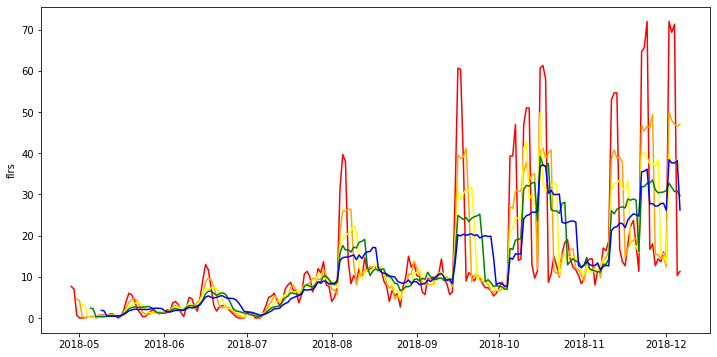

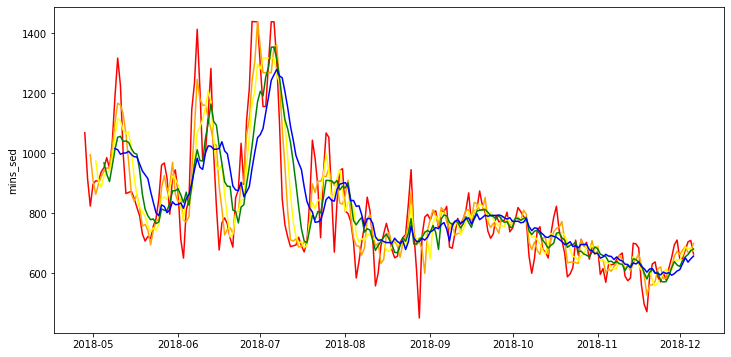

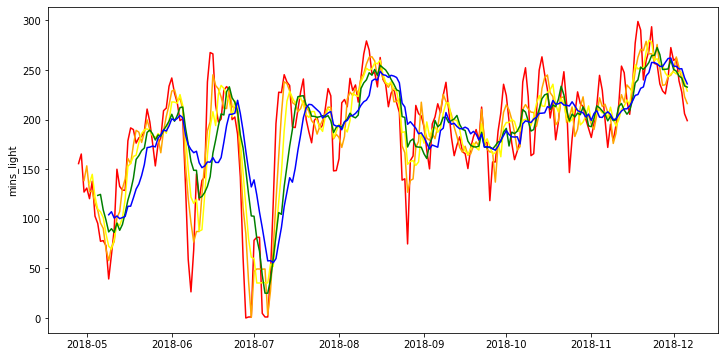

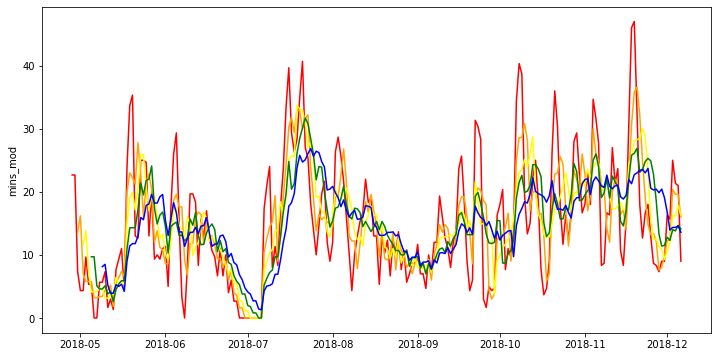

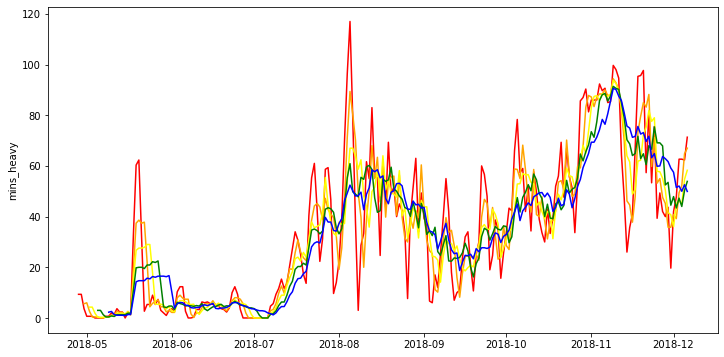

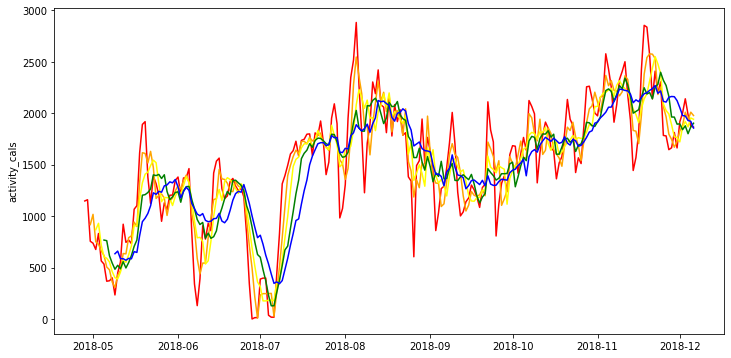

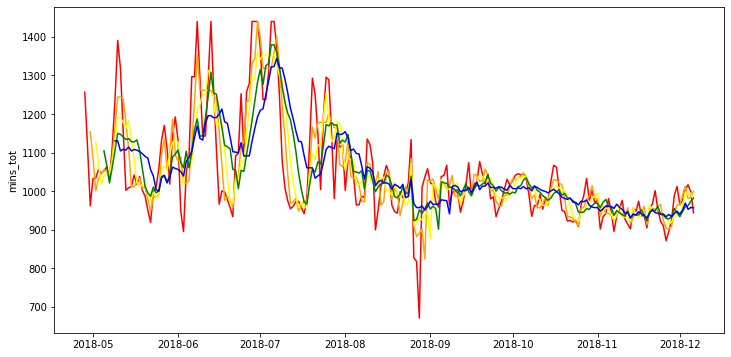

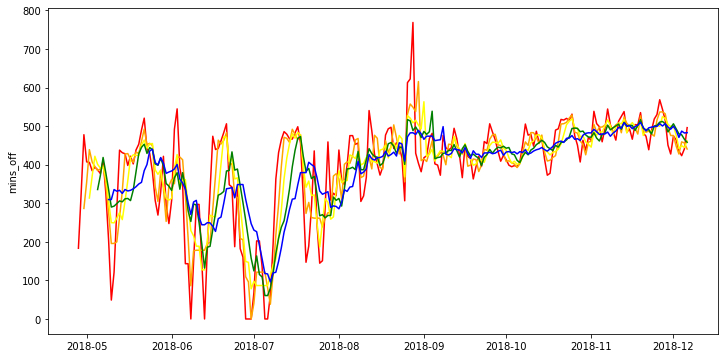

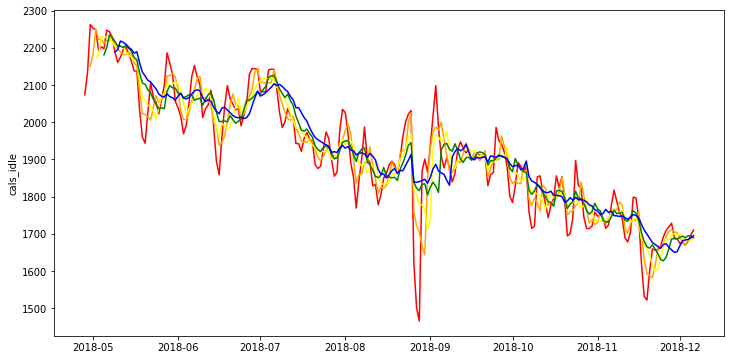

In [140]:
all_line_5sample_plots(dfn)